***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 02/01/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [2]:
%matplotlib notebook
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [3]:
Stoich = pd.read_csv("Stoic_Input.csv")    #Opening/Reading the Stoichiometric input file needed to be read
Atomic = pd.read_csv("Atom_Input.csv")     #Opening/Reading the Atomic input file needed to be read
Param = pd.read_csv("Param_Input.csv")     #Opening/Reading the Parameter input file needed to be read   
print("Reaction\Stoichiometric Matrix:\n",Stoich)
print("\n Atomic\Species Matrix:\n",Atomic)
print("\n Parameters Matrix:\n",Param)

Reaction\Stoichiometric Matrix:
   r\S  P_CO  P_O2  P_CO2  theta_CO  theta_O  theta_O2  theta_*
0  r1    -1     0      0         1        0         0       -1
1  r2     0    -1      0         0        0         1       -1
2  r3     0     0      0         0        2        -1       -1
3  r4     0     0      1        -1       -1         0        2

 Atomic\Species Matrix:
   A\S  CO  O2  CO2  CO*  O*  O2*  *
0   C   1   0    1    1   0    0  0
1   O   1   2    2    1   1    2  0
2   *   0   0    0    1   1    1  1

 Parameters Matrix:
    Reaction_Descrp Parameter        Values        Units
0              NaN         T  3.200000e+02            K
1              NaN         P  1.000000e-08          bar
2              NaN         R  8.314460e+00  JK^-1mol^-1
3               r1       k1f  2.000000e+00            -
4              NaN       k1r  6.650000e-09            -
5               r2       k2f  2.310000e+02            -
6              NaN       k2r  1.150000e+05            -
7           

In [4]:
#Checking the mass balance
at_mat = Atomic.iloc[0:,1:]           #The atomic matrix
err = 0                               #For counting error
for i in np.arange(len(Stoich)):    
    st_mat = Stoich.iloc[i,1:]        #The stoichiometric matrix
    res = np.dot(at_mat,st_mat)       #Performing the matrix product for every reaction i
    if any(a != 0 for a in res):      #Verifies that the matrix product returns 0s (i.e mass is balanced)
        print("Mass is not conserved in reaction %i. \n ... Check and correct the Atomic or Stoichiometric Matrices"%(i+1))
        err +=1
    elif (i == len(Stoich)-1 and err==0):    
        print("Mass is conserved.")

Mass is conserved.


In [5]:
#Extracting K values
def kextract(Param):
    veck=[]
    for j in np.arange(len(Param.iloc[:,1])): #looping through second column
        if 'k' in Param.iloc[j,1]:
            veck.append(Param.iloc[j,2])  
    return np.array(veck) #Converts from list to array

def aextract(Param):
    veca=[]
    for j in np.arange(len(Param.iloc[:,0])): #looping through second column
        if ('const' == Param.iloc[j,0]) and ('a' in Param.iloc[j,1]):  #checking the first and second columns
            veca.append(Param.iloc[j,2])
    return np.array(veca) #Converts from list to array

def bextract(Param):
    vecb=[]
    for j in np.arange(len(Param.iloc[:,0])): #looping through second column
        if ('const' == Param.iloc[j,0]) and ('b' in Param.iloc[j,1]):  #checking the first and second columns
            vecb.append(Param.iloc[j,2])
    return np.array(vecb) #Converts from list to array

In [6]:
def ratecoeff(kref,a,b,th1,th2):
    K = kref*np.exp((a*th1 + b*th2))  #/RT lumped into a and b assuming T is constant
    return K

In [7]:
def sol(t,u,k,a,b,Atomic,Stoich):
    #Only need to change:
   
    #------------------------------------------
    # 1 = CO ; 2 = O ; 3 = O2 ; 4 = *
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    THETA = [th1,th2,th3,th4] #Coverages being investigated
        #Partial Pressures (Assuming all same as P)
    P1 = Param.iloc[1,2]#P_CO
    P2 = Param.iloc[1,2]#P_O2
    P3 = Param.iloc[1,2]#P_CO2
    #------------------------------------------
    
    Nr = len(Stoich) #Number of rows in your your stoich matrix, i.e (Number of reactions)
    

    kf = k[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
    kr = k[1::2] #Pulling out the reverse rxn rate constants 
    
    a_f = a[0::2]
    a_r = a[1::2]
    
    b_f = b[0::2]
    b_r = b[1::2]
    
    #Note: # th1 = CO ; th2 = O ; th3 = O2 ; th4 = *
    #for i in range(len(kf)): #Adding Coverage dependence to the rate coefficient
    #    kf[i] = ratecoeff(kf[i],a,b,th1,th2)
    #    kr[i] = ratecoeff(kr[i],a,b,th1,th2)

    D = []      #Empty Vector For holding rate of change of coverage values
    r = [None] * Nr  #Empty Vector for holding rate of a specific reaction
    
    #Calculating the rates of reactions:
    for j in np.arange(Nr):   #Looping through the reactions
        matr = [P1,P2,P3]+THETA  #concatenating into the matrix, matr
        fwd = []
        rvs = []
        for i in np.arange(len(Stoich.iloc[0,:])-1):
            if Stoich.iloc[j,i+1]<0: #extracting only forward relevant rate parameters  #forward rxn reactants /encounter probability
                fwd.append(matr[i]**abs(Stoich.iloc[j,i+1]))
                
            if Stoich.iloc[j,i+1]>0: #extracting only reverse relevant rate parameters  #reverse rxn reactants /encounter probability
                rvs.append(matr[i]**abs(Stoich.iloc[j,i+1]))   
                
        r[j] = (ratecoeff(kf[j],a_f[j],b_f[j],th1,th2)*np.prod(fwd)) - (ratecoeff(kr[j],a_r[j],b_r[j],th1,th2)*np.prod(rvs)) #Calculating the rate of reaction
    

    #Differential Equations to calculate the change in coverages
    for i in np.arange(len(Stoich.iloc[:,4:])):
        dsum=0
        for j in np.arange(Nr):
            
            dsum += Stoich.iloc[j,i+4]*r[j] #Calculating the rate of production of a species i
        
        D.append(dsum)

    return D  #   CO |  O  |  O2   |  *

def Kinetics(k,a,b,Atomic,Stoich,init,Time,Teval=None):
    t_span = (Time[0], Time[-1])
    solve = solve_ivp(sol,t_span,init, args=(k,a,b,Atomic,Stoich),method='BDF', t_eval=Teval, rtol = 1E-6,atol = 1E-8)
    solv = np.transpose(solve.y)
    #print(k)
    return solv


Running the ODE solver: (Getting the coverage profiles)

In [80]:
%%time
#initial values:
TCO_in = 0.0
TO_in = 0.0
TO2_in = 0.0
TE_in = 1 - TCO_in-TO_in-TO2_in
#init      CO | O  | O2   | *
init = [TCO_in,TO_in,TO2_in,TE_in]  #initial values

k = kextract(Param)
a = aextract(Param)
b = bextract(Param)
actual_coeff = np.concatenate((k,a,b)) #To be used to compare prediction
Time =np.linspace(0, 6e6, num=1000)
t_span = (Time[0], Time[-1])
solve = solve_ivp(sol,t_span,init, args=(k,a,b,Atomic,Stoich),method='BDF', rtol = 1E-5,atol = 1E-7)#Obtaining the resulting Concentration of Coverages
solv = np.transpose(solve.y)
time_sol = np.transpose(solve.t)


CPU times: user 542 ms, sys: 4.3 ms, total: 546 ms
Wall time: 543 ms


kref is constant (determined through DFT from other papers) assuming Temperature is constant 320 K

$$k(\theta_i) =  k_{ref} * e^{\frac{ \sum \beta_i \theta_i}{k_B T}}$$
In this code:
$$k(\theta_i) =  k_{ref} * e^{a \theta_{CO} + b \theta_O + c \theta_{O_2}}$$

In [81]:
#Reading in values from KMC simulation
KMC = pd.read_csv("KMC_Coverages.csv")

Plotting:

<IPython.core.display.Javascript object>


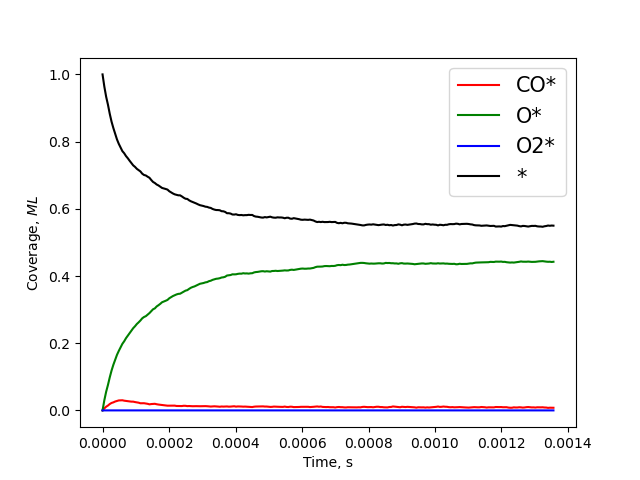

In [82]:
time_sol = KMC.iloc[:,1]
C_CO = KMC.iloc[:,2]
C_O = KMC.iloc[:,3]
C_O2 = KMC.iloc[:,4]
C_E = KMC.iloc[:,5]

plt.figure(1)
plt.plot(time_sol, C_CO,'r-', label='CO*')        
plt.plot(time_sol, C_O,'g-', label='O*') 
plt.plot(time_sol, C_O2, 'b-', label='O2*') 
plt.plot(time_sol, C_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()

<IPython.core.display.Javascript object>


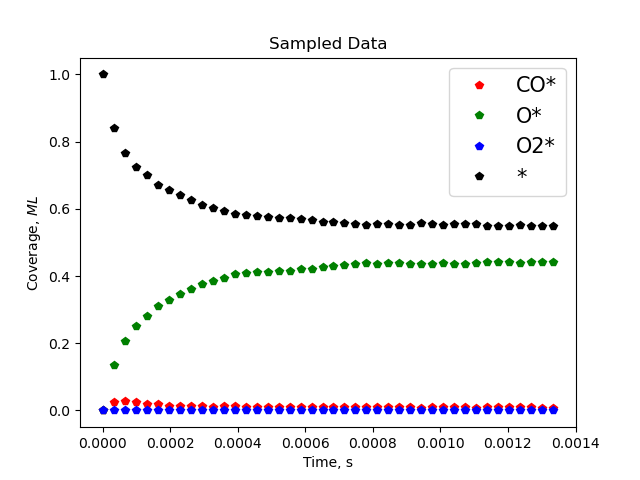

In [83]:
n = 40
Time_t = time_sol[::round(len(time_sol)/n)]
C_t_CO = C_CO[::round(len(C_CO)/n)]
C_t_O = C_O[::round(len(C_O)/n)]
C_t_O2 = C_O2[::round(len(C_O2)/n)]
C_t_E = C_E[::round(len(C_E)/n)]

plt.figure(2)
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

<IPython.core.display.Javascript object>


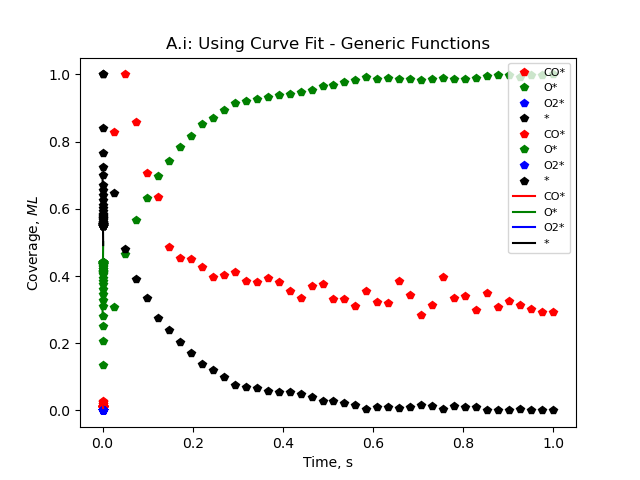

In [84]:
#Feature Scaling - Normalization
mint = min(Time_t)
maxt = max(Time_t)
Time_tn = (Time_t-mint)/(maxt-mint)
minCO = min(C_t_CO)
maxCO = max(C_t_CO)
C_t_COn = (C_t_CO-minCO)/(maxCO-minCO)
minO = min(C_t_O)
maxO = max(C_t_O)
C_t_On = (C_t_O-minO)/(maxO-minO)
minO2 = min(C_t_O2)
maxO2 = max(C_t_O2)
C_t_O2n = (C_t_O2-minO2)/(maxO2-minO2)
minE = min(C_t_E)
maxE = max(C_t_E)
C_t_En = (C_t_E-minE)/(maxE-minE)

plt.figure(3)
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Normalized Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

In [85]:
Guess_Param = pd.read_csv("Param_Input_Guess.csv")     #Opening/Reading the Parameter input file needed to be read   
print("\n The Guess Parameters Matrix:\n",Guess_Param)
print("\n")


 The Guess Parameters Matrix:
    Reaction_Descrp Parameter        Values        Units
0              NaN         T  3.200000e+02            K
1              NaN         P  1.000000e-08          bar
2              NaN         R  8.314460e+00  JK^-1mol^-1
3               r1       k1f  5.810000e-02            -
4              NaN       k1r  5.810000e-02            -
5               r2       k2f  7.690000e+02            -
6              NaN       k2r  1.300000e+16            -
7               r3       k3f  5.300000e+03            -
8              NaN       k3r  3.630000e+13            -
9               r4       k4f  9.350000e-01            -
10             NaN       k4r  0.000000e+00            -
11           const       a1f  1.000000e+00            -
12           const       a1r  1.000000e+00            -
13           const       a2f  1.000000e+00            -
14           const       a2r  1.000000e+00            -
15           const       a3f  1.000000e+00            -
16           con

In [86]:
Guessk = kextract(Guess_Param)
Guessa = aextract(Guess_Param)
Guessb = bextract(Guess_Param)

$$ error = \left <(c_{pred} - c_{actual})^2 \right> $$

In [87]:
C_dat = np.c_[C_t_CO,C_t_O,C_t_O2,C_t_E]
C_datn = np.c_[C_t_COn,C_t_On,C_t_O2n,C_t_En] #Normalized Concentrations

### [ A ] Using Curve Fit [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

### Simple Fitting Using Curve Fit - Implementing Kinetic Function

In [109]:
%%time
from numpy import inf
def curvefitfn(C_dat,Time_t,C_datn,Time_tn,k,a,b,Atomic,Stoich,plt=False):
    n = 2*len(Stoich) #Number of each constant (8)
    coeff = np.concatenate((k, a, b)) #Concatenating the constants
    def test_func(x, *Guess):
        Guess_k = Guess[0:n]
        Guess_a = Guess[n:2*n]
        Guess_b = Guess[2*n:3*n]
        
        Conc_init = C_dat[0,:]
        func = Kinetics(Guess_k,Guess_a,Guess_b,Atomic,Stoich,Conc_init,Time_t,Time_t)
        func[:,0] = (func[:,0]-minCO)/(maxCO-minCO)
        func[:,1] = (func[:,1]-minO)/(maxO-minO)
        func[:,2] = (func[:,2]-minO2)/(maxO2-minO2)
        func[:,3] = (func[:,3]-minE)/(maxE-minE)
        func = np.reshape(func, func.size)
        return  func 

    x_values = Time_tn
    y_values = np.reshape(C_datn, C_datn.size)
    
    params, params_covariance = optimize.curve_fit(test_func, x_values, y_values, method ='lm', 
                                                    bounds=(0,inf),maxfev=1000000, ftol = 1e9
                                                    ,p0=coeff)
    yfit = test_func(x_values, *params)

    c_fit=yfit.reshape(np.shape(C_datn)) 
    if plt==False:
        return c_fit,params,params_covariance
    else:
        return c_fit

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


In [110]:
%%time
n = 2*len(Stoich) #Number of each constant (8)
c_fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,k,a,b,Atomic,Stoich)
print(' \033[1m' + 'Fitted Parameters (No change in k): \n'+ '\033[0m')
print('Rate Constants:',params[0:n])
print('a Constants:',params[n:2*n])
print('b Constants:',params[2*n:3*n])

converg = np.sqrt(np.diag(params_covariance))
print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
print('Rate Constants:',converg[0:n])
print('a Constants:',converg[n:2*n])
print('b Constants:',converg[2*n:3*n])

ValueError: array must not contain infs or NaNs

## Using CurveFit : Varying inital k value guesses - *resizing the initial values

In [66]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

def curvefitplot(k_const,a_const,b_const):
    fig, ax = plt.subplots()
    ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
    ax.plot(Time_tn, C_t_On,'gp', label='O*') 
    ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
    ax.plot(Time_tn, C_t_En, 'kp', label='*') 
    ax.set_title("Using Curve Fit - With Function Fit being of Kinetic Origin")
    ax.set_xlabel('Time, s')
    ax.set_ylabel("Coverage, $ML$")
    ax.legend(fontsize=8, loc='best')
    
    const_k = k * (1+(k_const/100))
    const_a = a * (1+(a_const/100))
    const_b = b * (1+(b_const/100))
    coeff = np.concatenate((const_k, const_a, const_b)) #The Initial Guesses 
    
    fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,const_k,const_a,const_b,Atomic,Stoich,plt=False)
    
    n = 2*len(Stoich) #Number of each constant (8)

    line1, = plt.plot(Time_tn, fit[:,0], 'r-')
    line2, = plt.plot(Time_tn, fit[:,1], 'g-')
    line3, = plt.plot(Time_tn, fit[:,2], 'b-')
    line4, = plt.plot(Time_tn, fit[:,3], 'k-')
    
    print(' \033[1m' + 'Actual constants: \n'+ '\033[0m') 
    print('Rate Constants:',actual_coeff[0:n])
    print('a Constants:',actual_coeff[n:2*n])
    print('b Constants:',actual_coeff[2*n:3*n])

    print('\n \033[1m' + 'Initial guess: \n'+ '\033[0m')
    print('Rate Constants:',coeff[0:n])
    print('a Constants:',coeff[n:2*n])
    print('b Constants:',coeff[2*n:3*n])
    
    print('\n \033[1m' + 'Final predictions: \n'+ '\033[0m')
    print('Rate Constants:',params[0:n])
    print('a Constants:',params[n:2*n])
    print('b Constants:',params[2*n:3*n])
    
    converg = np.sqrt(np.diag(params_covariance))
    print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
    print('Rate Constants:',converg[0:n])
    print('a Constants:',converg[n:2*n])
    print('b Constants:',converg[2*n:3*n])

    normconverg = converg/actual_coeff
    print('\n \033[1m' + 'Normalized Confidence Intervals:'+ '\033[0m')
    print('Rate Constants:',normconverg[0:n])
    print('a Constants:',normconverg[n:2*n])
    print('b Constants:',normconverg[2*n:3*n])

interactive(curvefitplot, {'manual': True}, k_const = widgets.IntSlider(value=0, min=-150, max=150, step=10)
                                            ,a_const = widgets.IntSlider(value=0, min=-150, max=150, step=10)
                                            ,b_const = widgets.IntSlider(value=0, min=-150, max=150, step=10) )


CPU times: user 28.4 ms, sys: 1.39 ms, total: 29.8 ms
Wall time: 28.7 ms


interactive(children=(IntSlider(value=0, description='k_const', max=150, min=-150, step=10), IntSlider(value=0…

## Using CurveFit : Varying inital k value guesses - *resizing the initial values with random numbers

<IPython.core.display.Javascript object>


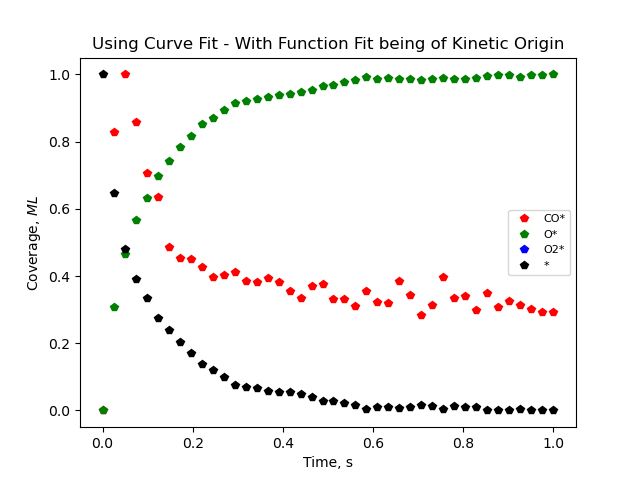

ValueError: array must not contain infs or NaNs

In [67]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using Curve Fit - With Function Fit being of Kinetic Origin")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')

#random matrix:
ranmat_k = []
ranmat_a = []
ranmat_b = []

n = 2*len(Stoich) #Number of each constant (8)

for i in np.arange(n):
    ranmat_k.append( 10**(np.random.uniform(-1,1)) )
    ranmat_a.append( 10**(np.random.uniform(-1,1)) )
    ranmat_b.append( 10**(np.random.uniform(-1,1)) )

    
actual_k = actual_coeff[0:n]
actual_a = actual_coeff[n:2*n]
actual_b = actual_coeff[2*n:3*n]

const_k = actual_k * ranmat_k
const_a = actual_a * ranmat_a
const_b = actual_b * ranmat_b
coeff = np.concatenate((const_k, const_a, const_b)) #The Initial Guesses 

fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,const_k,const_a,const_b,Atomic,Stoich,plt=False)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')

print(' \033[1m' + 'The Random Matrix used: \n'+ '\033[0m')
print('Rate Constants:',ranmat_k)
print('a Constants:',ranmat_a)
print('b Constants:',ranmat_b)

print('\n \033[1m' + 'Actual constants: \n'+ '\033[0m')
print('Rate Constants:',actual_coeff[0:n])
print('a Constants:',actual_coeff[n:2*n])
print('b Constants:',actual_coeff[2*n:3*n])

print('\n \033[1m' + 'Initial guess: \n'+ '\033[0m')
print('Rate Constants:',coeff[0:n])
print('a Constants:',coeff[n:2*n])
print('b Constants:',coeff[2*n:3*n])

print('\n \033[1m' + 'Final predictions: \n'+ '\033[0m')
print('Rate Constants:',params[0:n])
print('a Constants:',params[n:2*n])
print('b Constants:',params[2*n:3*n])

converg = np.sqrt(np.diag(params_covariance))
print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
print('Rate Constants:',converg[0:n])
print('a Constants:',converg[n:2*n])
print('b Constants:',converg[2*n:3*n])

normconverg = converg/actual_coeff
print('\n \033[1m' + 'Normalized Confidence Intervals:'+ '\033[0m')
print('Rate Constants:',normconverg[0:n])
print('a Constants:',normconverg[n:2*n])
print('b Constants:',normconverg[2*n:3*n])

### Custom Minimization function

In [68]:
def minfunc(Guess,Atomic,Stoich,Time,Conc):
    n = 2*len(Stoich) #Number of each constant (8)
    
    Guess_k = Guess[0:n]
    Guess_a = Guess[n:2*n]
    Guess_b = Guess[2*n:3*n]

    Conc_init = Conc[0,:]
    c_estim = Kinetics(Guess_k,Guess_a,Guess_b,Atomic,Stoich,Conc_init,Time,Time)
    c_estim[:,0] = (c_estim[:,0]-minCO)/(maxCO-minCO)
    c_estim[:,1] = (c_estim[:,1]-minO)/(maxO-minO)
    c_estim[:,2] = (c_estim[:,2]-minO2)/(maxO2-minO2)
    c_estim[:,3] = (c_estim[:,3]-minE)/(maxE-minE)
    w = 1
    error_t = (1/4)*(w*(Conc[:,0] - c_estim[:,0])**2 +w*(Conc[:,1] - c_estim[:,1])**2 +w*(Conc[:,2] - c_estim[:,2])**2 +w*(Conc[:,3] - c_estim[:,3])**2)
        
    error = sum(error_t)
    return error  

## Using L-BFGS-B: Varying inital k value guesses -*multyplying random error

<IPython.core.display.Javascript object>


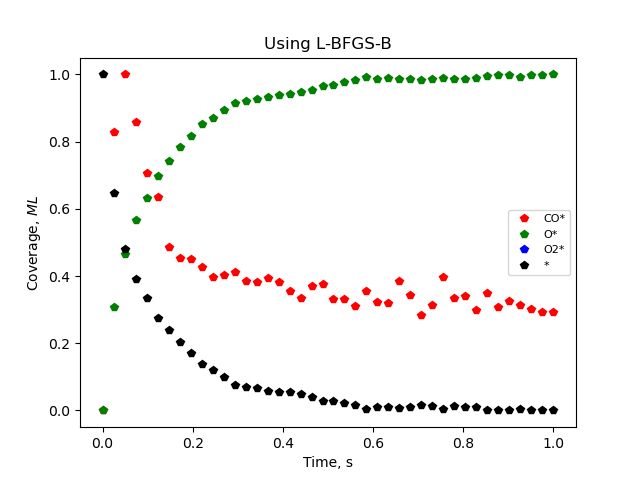

KeyError: -1

In [69]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using L-BFGS-B")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')

#random matrix:
ranmat_k = []
ranmat_a = []
ranmat_b = []

n = 2*len(Stoich) #Number of each constant (8)

for i in np.arange(n):
    ranmat_k.append( abs((1+(np.random.uniform(100,-100)/100))) )
    ranmat_a.append( abs((1+(np.random.uniform(100,-100)/100))) )
    ranmat_b.append( abs((1+(np.random.uniform(100,-100)/100))) )

    
actual_k = actual_coeff[0:n]
actual_a = actual_coeff[n:2*n]
actual_b = actual_coeff[2*n:3*n]

const_k = actual_k * ranmat_k
const_a = actual_a * ranmat_a
const_b = actual_b * ranmat_b
coeff = np.concatenate((const_k, const_a, const_b)) #The Initial Guesses 


#Setting Bounds
#max K Guess parameters
sc = 1e2 #scaling value
mkval = const_k*sc #max kvals
ma = 10 #max a values
mb = 10 #max b values
c = 3 #number of constants

bounds = np.empty([c*n,2])
for i in range(n):
    bounds[i] = (0,mkval[i])
    bounds[n+i] = (-ma,ma)
    bounds[2*n + i] = (-mb,mb)

Guess = coeff
result = optimize.minimize(minfunc,Guess,args=(Atomic,Stoich,Time_t,C_dat,), method="L-BFGS-B",  bounds=bounds , options={'maxcor': 100, 'ftol': 1e-3, 'gtol': 1e-15, 'eps': 1e-18, 'maxfun': 15000,'disp': False,'maxiter': 10, 'iprint': - 1, 'maxls': 35})      
coeff_fit = result.x
k_fit = coeff_fit[0:n]
a_fit = coeff_fit[n:2*n]
b_fit = coeff_fit[2*n:3*n]

fit = Kinetics(k_fit,a_fit,b_fit,Atomic,Stoich,init,Time_t,Time_t)
fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')

print(' \033[1m' + 'The Random Matrix used: \n'+ '\033[0m')
print('Rate Constants:',ranmat_k)
print('a Constants:',ranmat_a)
print('b Constants:',ranmat_b)

print('\n \033[1m' + 'Actual constants: \n'+ '\033[0m')
print('Rate Constants:',actual_coeff[0:n])
print('a Constants:',actual_coeff[n:2*n])
print('b Constants:',actual_coeff[2*n:3*n])

print('\n \033[1m' + 'Initial guess: \n'+ '\033[0m')
print('Rate Constants:',coeff[0:n])
print('a Constants:',coeff[n:2*n])
print('b Constants:',coeff[2*n:3*n])

print('\n \033[1m' + 'Final predictions: \n'+ '\033[0m')
print('Rate Constants:',k_fit)
print('a Constants:',a_fit)
print('b Constants:',b_fit)

# converg = np.sqrt(np.diag(params_covariance))
# print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
# print('Rate Constants:',converg[0:n])
# print('a Constants:',converg[n:2*n])
# print('b Constants:',converg[2*n:3*n])

# normconverg = converg/actual_coeff
# print('\n \033[1m' + 'Normalized Confidence Intervals:'+ '\033[0m')
# print('Rate Constants:',normconverg[0:n])
# print('a Constants:',normconverg[n:2*n])
# print('b Constants:',normconverg[2*n:3*n])

### [ B ] Using Differential Evolution [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

In [70]:
%%time
from scipy.optimize import curve_fit, differential_evolution    
#------------------------------------------------
def error_fun(Guess,Atomic,Stoich,Time,Conc):
    n = 2*len(Stoich) #Number of each constant (8)
    
    Guess_k = Guess[0:n]
    Guess_a = Guess[n:2*n]
    Guess_b = Guess[2*n:3*n]

    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guess_k,Guess_a,Guess_b,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#Setting Bounds
#max K Guess parameters
sc = 1e2 #scaling value
mkval = const_k*sc #max kvals
ma = 10 #max a values
mb = 10 #max b values
c = 3 #number of constants

bounds = np.empty([c*n,2])
for i in range(n):
    bounds[i] = (0,mkval[i])
    bounds[n+i] = (-ma,ma)
    bounds[2*n + i] = (-mb,mb)
#------------------------------------------------    
res_b = differential_evolution(error_fun,
                             bounds= bounds,
                             args=(Atomic,Stoich,Time_t,C_dat),
                             seed=45, maxiter=2,tol=1e-4,disp=True, polish=True,workers=1,x0=actual_coeff)

KeyError: -1

In [71]:
coeff_fit = res_b.x
k_fit = coeff_fit[0:n]
a_fit = coeff_fit[n:2*n]
b_fit = coeff_fit[2*n:3*n]

fit = Kinetics(k_fit,a_fit,b_fit,Atomic,Stoich,init,Time_t,Time_t)

C_fit_CO = (fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using Diff Evolution")
plt.show()

print('\n \033[1m' + 'Actual constants: \n'+ '\033[0m')
print('Rate Constants:',actual_coeff[0:n])
print('a Constants:',actual_coeff[n:2*n])
print('b Constants:',actual_coeff[2*n:3*n])

print('\n \033[1m' + 'Initial guess: \n'+ '\033[0m')
print('Rate Constants:',coeff[0:n])
print('a Constants:',coeff[n:2*n])
print('b Constants:',coeff[2*n:3*n])

print('\n \033[1m' + 'Final predictions: \n'+ '\033[0m')
print('Rate Constants:',k_fit)
print('a Constants:',a_fit)
print('b Constants:',b_fit)

# converg = np.sqrt(np.diag(params_covariance))
# print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
# print('Rate Constants:',converg[0:n])
# print('a Constants:',converg[n:2*n])
# print('b Constants:',converg[2*n:3*n])

# normconverg = converg/actual_coeff
# print('\n \033[1m' + 'Normalized Confidence Intervals:'+ '\033[0m')
# print('Rate Constants:',normconverg[0:n])
# print('a Constants:',normconverg[n:2*n])
# print('b Constants:',normconverg[2*n:3*n])

NameError: name 'res_b' is not defined

### [ C ] Using SHGO - Simplicial homology global optimization [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo)

In [72]:
%%time
from scipy.optimize import shgo    

Guess = actual_coeff
#------------------------------------------------
def error_fun(Guess,Atomic,Stoich,Time,Conc):
    n = 2*len(Stoich) #Number of each constant (8)
    
    Guess_k = Guess[0:n]
    Guess_a = Guess[n:2*n]
    Guess_b = Guess[2*n:3*n]

    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guess_k,Guess_a,Guess_b,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#Setting Bounds
#max K Guess parameters
sc = 1e2 #scaling value
mkval = const_k*sc #max kvals
ma = 1 #max a values
mb = 1 #max b values
c = 3 #number of constants

bounds = np.empty([c*n,2])
for i in range(n):
    bounds[i] = (0,mkval[i])
    bounds[n+i] = (-ma,ma)
    bounds[2*n+i] = (-mb,mb)
#------------------------------------------------  
    
res_c = shgo(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     iters=1, options = {'ftol': 1e-05, 'gtol': 1e-05,'maxfun': 400, 'maxiter': 2, 'disp' : True})

Splitting first generation


KeyError: -1

In [73]:
def CI95(fvec, jac):
    #Returns the 95% confidence interval on parameters
    
    rss = np.sum(fvec**2) # residual sum of squares
    
    n, p = jac.shape     # number of data points and parameters
   
    nmp = n - p          # the statistical degrees of freedom
    
    ssq = rss / nmp      # mean residual error
    
    J = np.matrix(jac)   # the Jacobian
    
    c = inv(J.T*J)       # covariance matrix
    
    pcov = c * ssq       # variance-covariance matrix.
    # Diagonal terms provide error estimate based on uncorrelated parameters.
    
    err = np.sqrt(np.diag(np.abs(pcov))) * 1.96  # std. dev. x 1.96 -> 95% conf
    # Here err is the full 95% area under the normal distribution curve. 
    return err

In [74]:
coeff_fit = res_c.x
k_fit = coeff_fit[0:n]
a_fit = coeff_fit[n:2*n]
b_fit = coeff_fit[2*n:3*n]

fit = Kinetics(k_fit,a_fit,b_fit,Atomic,Stoich,init,Time_t,Time_t)

C_fit_CO = (fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using SHGO")
plt.show()

print('\n \033[1m' + 'Actual constants: \n'+ '\033[0m')
print('Rate Constants:',actual_coeff[0:n])
print('a Constants:',actual_coeff[n:2*n])
print('b Constants:',actual_coeff[2*n:3*n])

print('\n \033[1m' + 'Initial guess: \n'+ '\033[0m')
print('Rate Constants:',coeff[0:n])
print('a Constants:',coeff[n:2*n])
print('b Constants:',coeff[2*n:3*n])

print('\n \033[1m' + 'Final predictions: \n'+ '\033[0m')
print('Rate Constants:',k_fit)
print('a Constants:',a_fit)
print('b Constants:',b_fit)

# converg = np.sqrt(np.diag(params_covariance))
# print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
# print('Rate Constants:',converg[0:n])
# print('a Constants:',converg[n:2*n])
# print('b Constants:',converg[2*n:3*n])

# normconverg = converg/actual_coeff
# print('\n \033[1m' + 'Normalized Confidence Intervals:'+ '\033[0m')
# print('Rate Constants:',normconverg[0:n])
# print('a Constants:',normconverg[n:2*n])
# print('b Constants:',normconverg[2*n:3*n])

NameError: name 'res_c' is not defined

### [ D ] Using Dual Annealing - Combination of CSA (Classical Simulated Annealing) and FSA (Fast Simulated Annealing)  [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html?highlight=dual_annealing#scipy.optimize.dual_annealing)

In [75]:
%%time
from scipy.optimize import dual_annealing    

#------------------------------------------------
def error_fun(Guess,Atomic,Stoich,Time,Conc):
    Guess_k = Guess[0:n]
    Guess_a = Guess[n:2*n]
    Guess_b = Guess[2*n:3*n]

    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guess_k,Guess_a,Guess_b,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#Setting Bounds
#max K Guess parameters
sc = 1e2 #scaling value
mkval = const_k*sc #max kvals
ma = 10 #max a values
mb = 10 #max b values
c = 3 #number of constants

bounds = np.empty([c*n,2])
for i in range(n):
    bounds[i] = (0,mkval[i])
    bounds[n+i] = (-ma,ma)
    bounds[2*n+i] = (-mb,mb)
#------------------------------------------------
    
res_d = dual_annealing(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     maxiter=10, maxfun = 5000, seed=45,x0=actual_coeff)

KeyError: -1

<IPython.core.display.Javascript object>


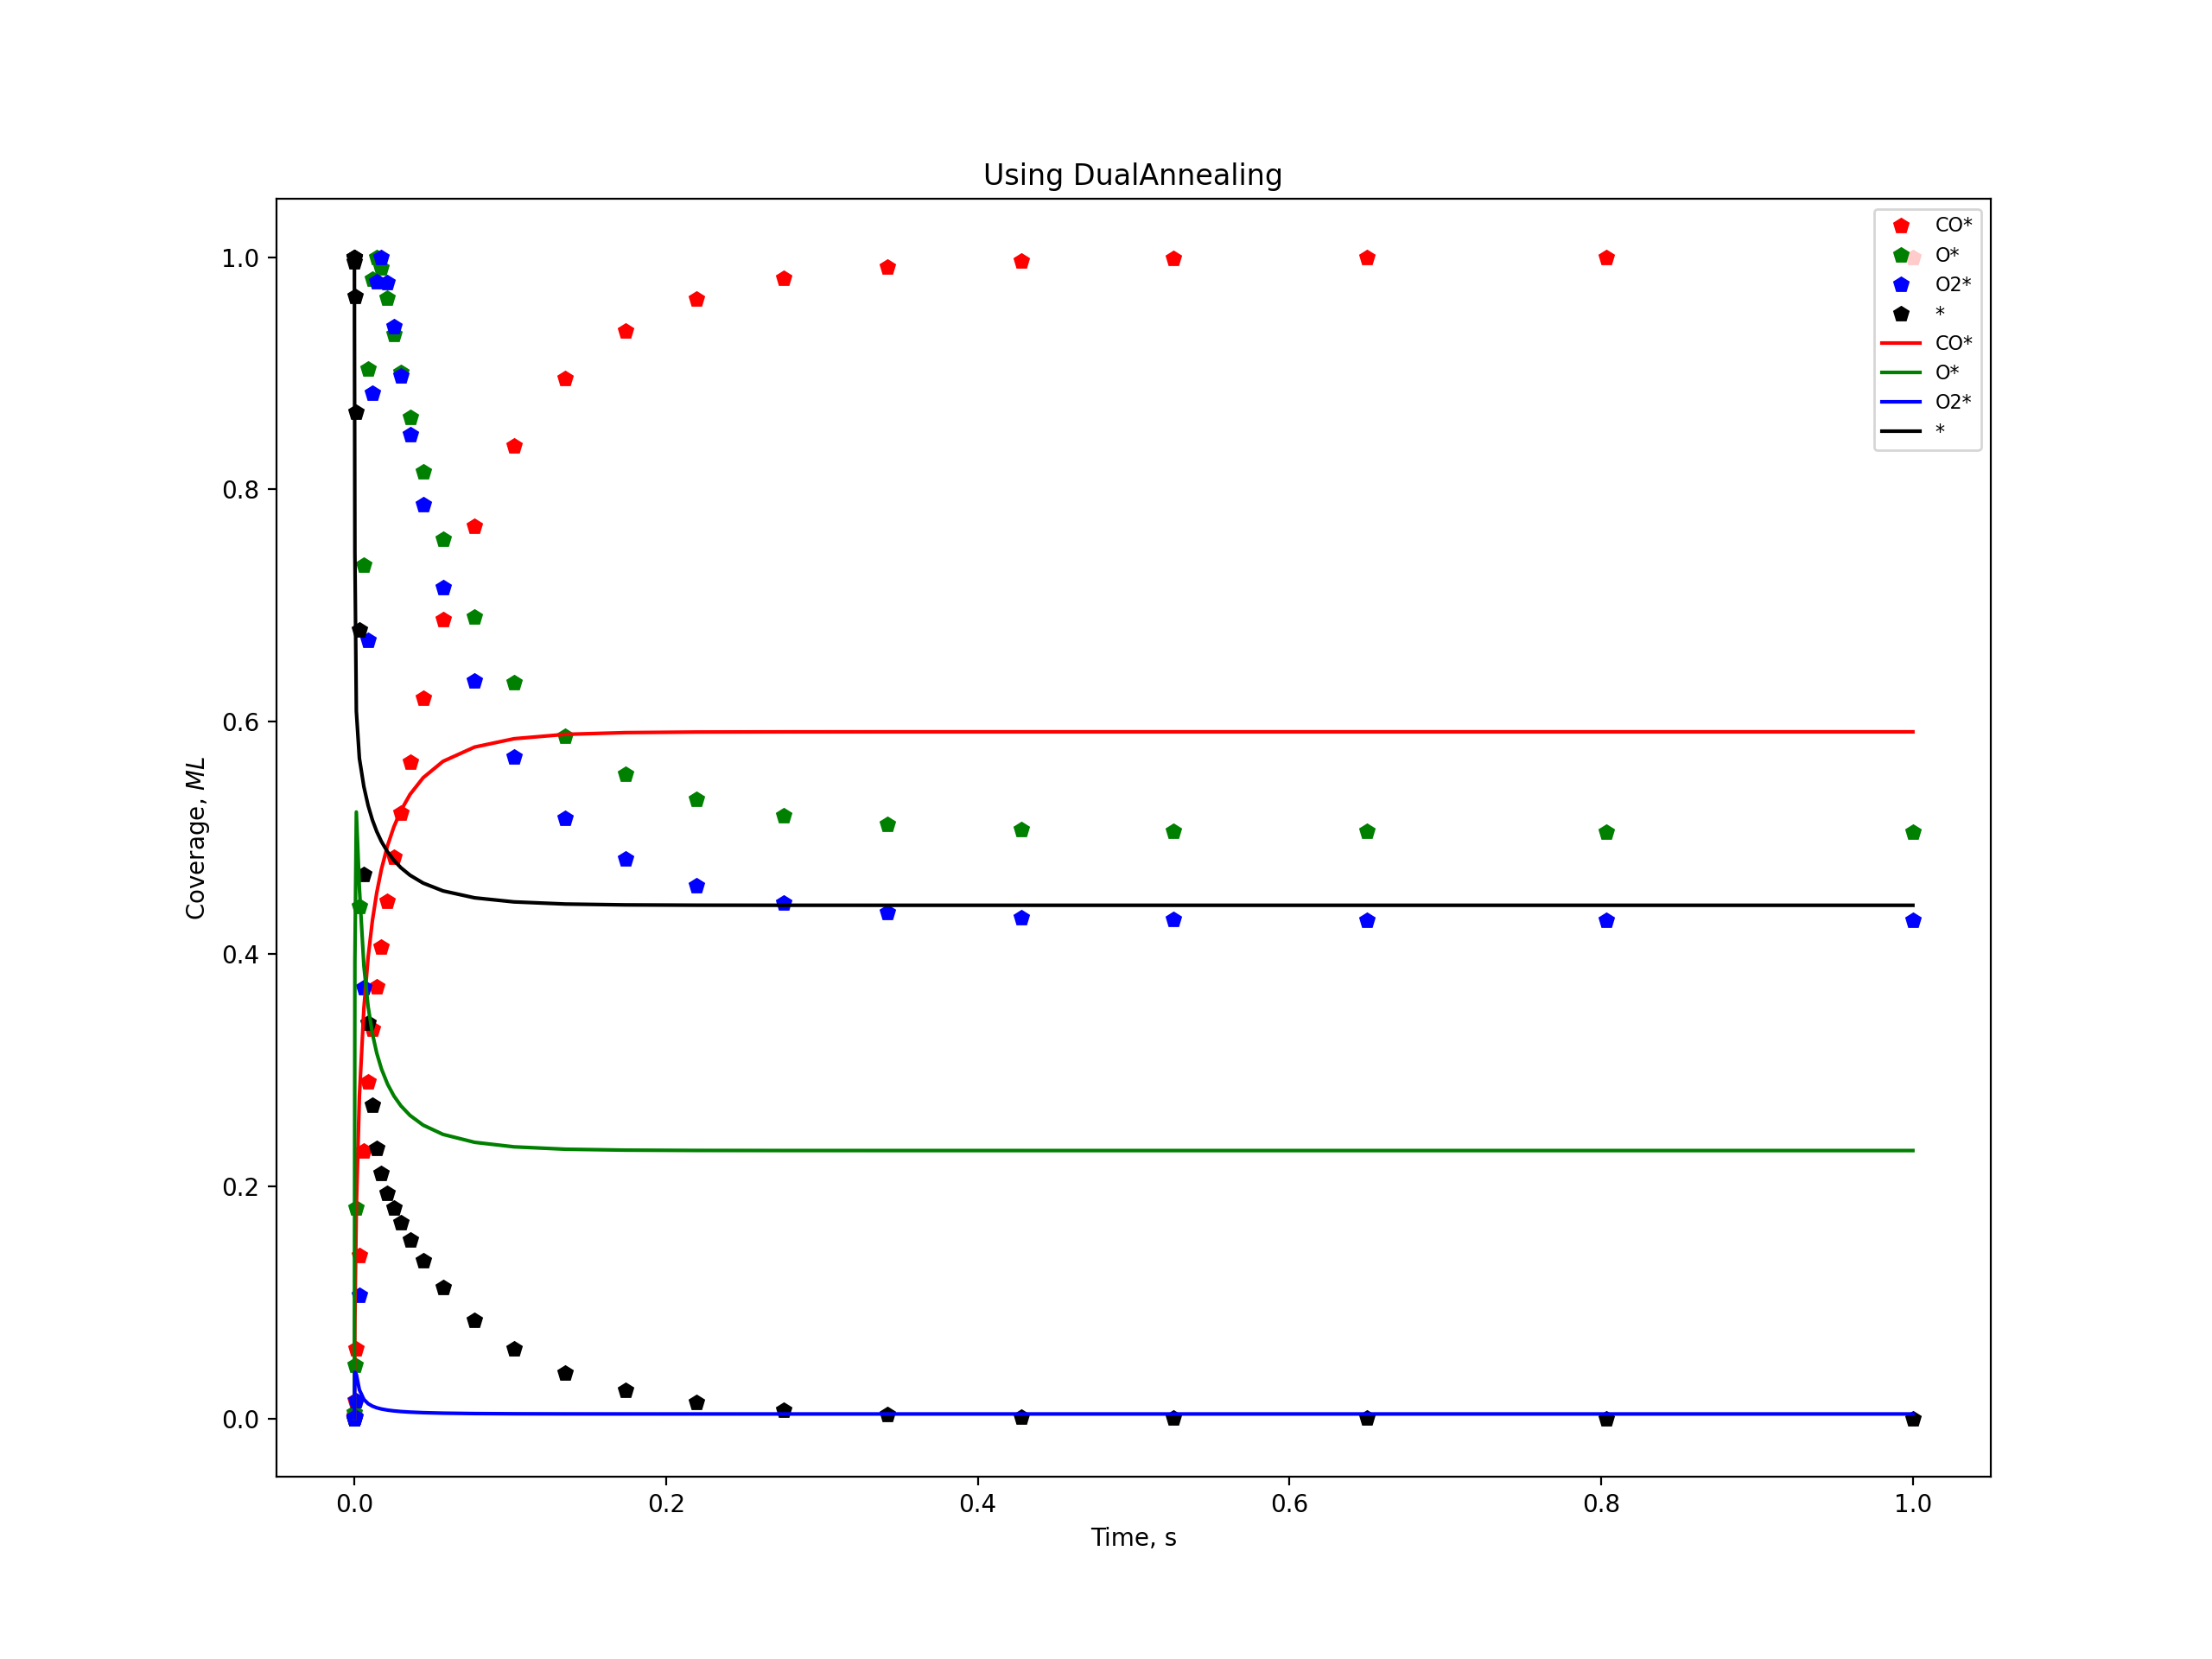


 Actual constants: 

Rate Constants: [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02]
a Constants: [1. 1. 1. 1. 1. 1. 1. 1.]
b Constants: [1. 1. 1. 1. 1. 1. 1. 1.]

 Initial guess: 

Rate Constants: [1.98128166e+00 5.22485442e-09 3.91984767e+02 1.49731267e+05
 1.14714012e+08 1.43479114e-02 4.45195014e-06 4.38320025e+02]
a Constants: [0.67118729 1.71962188 1.82856783 0.15361865 1.66583966 0.20924165
 1.08370198 1.27205436]
b Constants: [0.3080177  1.71756014 1.7497652  0.21896513 1.968208   0.57062618
 0.64122537 1.74870766]

 Final predictions: 

Rate Constants: [5.57853642e+01 5.22485442e-07 9.30032875e+03 2.57846114e+06
 6.66961427e+08 4.64592102e-02 1.48800469e-04 4.72941575e+03]
a Constants: [-8.17332411 -5.65971558 -7.99849739  6.03805167 10.          3.00182013
 -4.0534246  -9.99988828]
b Constants: [ -9.84845388   2.33838606 -10.           6.96956681   3.12552033
  -4.17060104  -9.29784365  -0.68414064]


In [48]:
coeff_fit = res_d.x
k_fit = coeff_fit[0:n]
a_fit = coeff_fit[n:2*n]
b_fit = coeff_fit[2*n:3*n]

fit = Kinetics(k_fit,a_fit,b_fit,Atomic,Stoich,init,Time_t,Time_t)

C_fit_CO = (fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using DualAnnealing")
plt.show()

print('\n \033[1m' + 'Actual constants: \n'+ '\033[0m')
print('Rate Constants:',actual_coeff[0:n])
print('a Constants:',actual_coeff[n:2*n])
print('b Constants:',actual_coeff[2*n:3*n])

print('\n \033[1m' + 'Initial guess: \n'+ '\033[0m')
print('Rate Constants:',coeff[0:n])
print('a Constants:',coeff[n:2*n])
print('b Constants:',coeff[2*n:3*n])

print('\n \033[1m' + 'Final predictions: \n'+ '\033[0m')
print('Rate Constants:',k_fit)
print('a Constants:',a_fit)
print('b Constants:',b_fit)

# converg = np.sqrt(np.diag(params_covariance))
# print('\n \033[1m' + 'Confidence Intervals: \n'+ '\033[0m')
# print('Rate Constants:',converg[0:n])
# print('a Constants:',converg[n:2*n])
# print('b Constants:',converg[2*n:3*n])

# normconverg = converg/actual_coeff
# print('\n \033[1m' + 'Normalized Confidence Intervals:'+ '\033[0m')
# print('Rate Constants:',normconverg[0:n])
# print('a Constants:',normconverg[n:2*n])
# print('b Constants:',normconverg[2*n:3*n])

### Simple Fitting Using SPLINES

In [ ]:
%%time
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
#fitting spline - loop
x_values = Time_tn
C_fit_in = np.empty([len(x_values),4])
for i in np.arange(4):
    a = UnivariateSpline(x_values, C_datn[:,i], k=5)
    a.set_smoothing_factor(1e-5)
    C_fit_in[:,i] = a(x_values)
    
    
C_fit_CO = C_fit_in[:,0]
C_fit_O = C_fit_in[:,1]
C_fit_O2 = C_fit_in[:,2]
C_fit_E = C_fit_in[:,3]  

plt.figure()

#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using Splines")
plt.show()